In [53]:
# 1. 加载数据和可视化检查
# 导入数据包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# 载入数据
file = r'data_set/dugongs.txt'
# read_csv()中的参数sep: 指定分隔符，如果不指定参数，则会尝试使用逗号分隔。
dg = pd.read_csv(file, sep='\t')
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
Age       27 non-null float64
Length    27 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [54]:
x = dg['Age']
y = dg['Length']
# 注意reshape和resize的区别
x = np.resize(x, (27, 1))
y = np.resize(y, (27, 1))

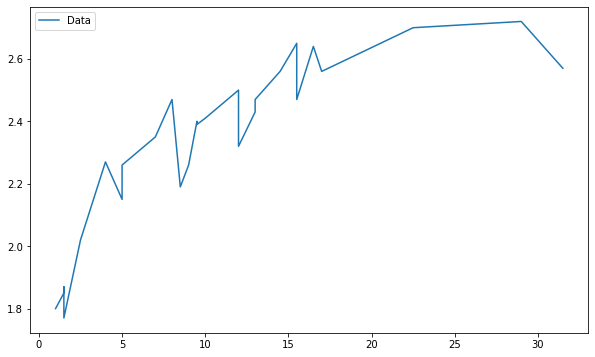

In [55]:
# 可视化检查
fig = plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data')
plt.legend()

In [56]:
# 2. 线性回归
# 为了与实际值构成的曲线，做一个比较，我们先做一个线性回归作为比较的基线。
lm = LinearRegression()
lm.fit(x, y)
prediction_linear = lm.predict(x)

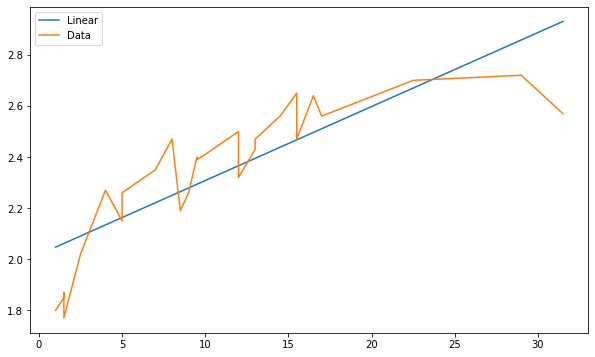

In [57]:
# 绘制观测值曲线与回归线
fig = plt.figure(figsize=(10, 6))
plt.plot(x, prediction_linear, label='Linear')
plt.plot(x, y, label='Data')
plt.legend()

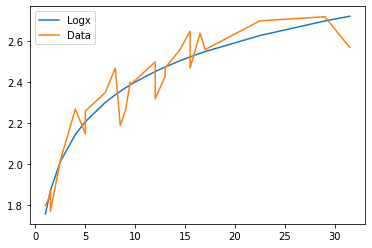

In [58]:
# 3.对数回归
# 对预测因子（x）进行对数转换，得到一个线性对数模型。
lm.fit(np.log(x), y)
prediction_logx = lm.predict(np.log(x))
plt.plot(x, prediction_logx, label='Logx')
plt.plot(x, y, label='Data')
plt.legend()

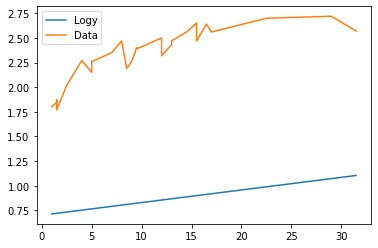

In [59]:
lm.fit(x, np.log(y))
prediction_logy = lm.predict(x)
plt.plot(x, prediction_logy, label='Logy')
plt.plot(x, y, label='Data')
plt.legend()

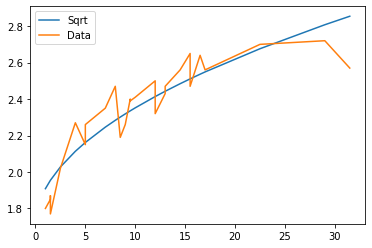

In [60]:
lm.fit(np.sqrt(x), y)
prediction_sqrt = lm.predict(np.sqrt(x))
plt.plot(x, prediction_sqrt, label='Sqrt')
plt.plot(x, y, label='Data')
plt.legend()

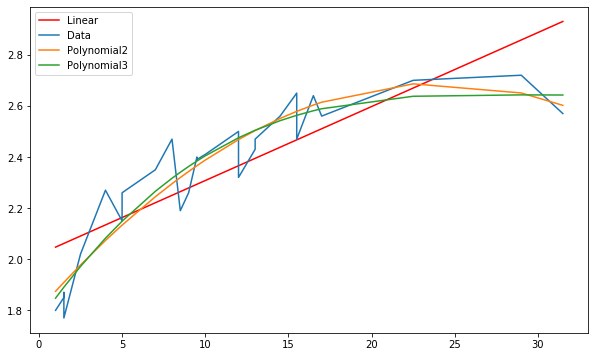

In [61]:
# 4.多项式回归
# 欠拟合情况
fig = plt.figure(figsize=(10, 6))
plt.plot(x, prediction_linear, label='Linear', color='red')
plt.plot(x, y, label='Data')
# 二阶多项式拟合
poly2 = PolynomialFeatures(2)
lm.fit(poly2.fit_transform(x), y)  # 对多项式转换后的x进行拟合
prediction_poly2 = lm.predict(poly2.fit_transform(x))  # 对多项式转换后的x进行预测
plt.plot(x, prediction_poly2, label='Polynomial2')
# 三阶多项式拟合
poly3 = PolynomialFeatures(3)
lm.fit(poly3.fit_transform(x), y)
prediction_poly3 = lm.predict(poly3.fit_transform(x))
plt.plot(x, prediction_poly3, label='Polynomial3')
plt.legend()

In [62]:
# 蛋糕尺寸与价格拟合的示例
# 训练数据
D = [[6], [8], [10], [14], [18]]
P = [[7], [9], [13], [17.5], [18]]
# 测试数据
# 对于0-26寸的范围，等间隔生成了1行100列的一个矩阵
D_test = np.linspace(0, 26, 100)
# 将1行100列的矩阵转化成100行1列的矩阵形式
D_test = np.resize(D_test, (100, 1))

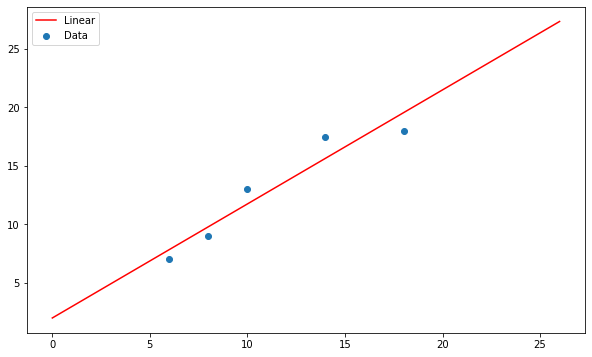

In [63]:
# 一次线性回归和预测
lm.fit(D, P)
P_pred = lm.predict(D_test)
# 一次线性回归直线
fig = plt.figure(figsize=(10, 6))
plt.plot(D_test, P_pred, label='Linear', color='red')
plt.scatter(D, P, label='Data')
plt.legend()

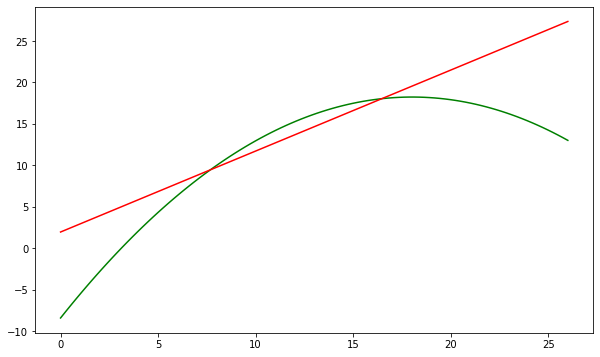

In [64]:
# 2次线性回归进行预测
poly2 = PolynomialFeatures(degree=2)
lm.fit(poly2.fit_transform(D), P)
P_poly2 = lm.predict(poly2.fit_transform(D_test))
fig = plt.figure(figsize=(10, 6))
plt.plot(D_test, P_poly2, label='Poly2', color='green')
plt.plot(D_test, P_pred, label='Linear', color='red')

In [65]:
# 3次线性回归进行预测
poly3 = PolynomialFeatures(degree=3)
lm.fit(poly3.fit_transform(D), P)
P_poly3 = lm.predict(poly3.fit_transform(D_test))
# 4次线性回归进行预测
poly4 = PolynomialFeatures(degree=4)
lm.fit(poly4.fit_transform(D), P)
P_poly4 = lm.predict(poly4.fit_transform(D_test))
# 5次线性回归进行预测
poly5 = PolynomialFeatures(degree=3)
lm.fit(poly5.fit_transform(D), P)
P_poly5 = lm.predict(poly5.fit_transform(D_test))

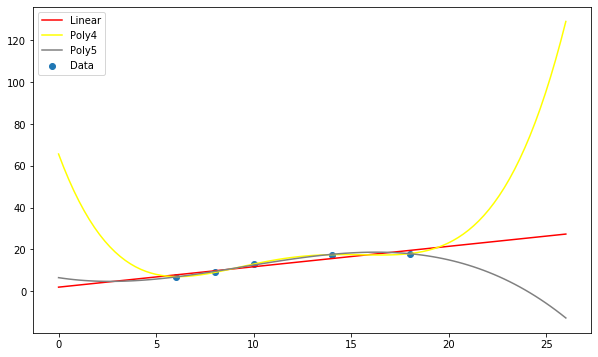

In [66]:
# 绘图
fig = plt.figure(figsize=(10, 6))
plt.plot(D_test, P_pred, label='Linear', color='red')
plt.plot(D_test, P_poly4, label='Poly4', color='yellow')
plt.plot(D_test, P_poly5, label='Poly5', color='grey')
plt.scatter(D, P, label='Data')
plt.legend()

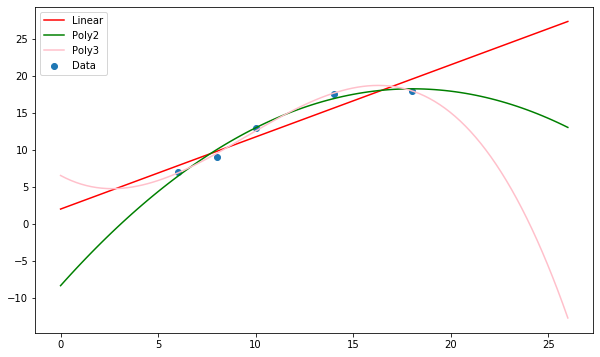

In [67]:
fig = plt.figure(figsize=(10, 6))
plt.plot(D_test, P_pred, label='Linear', color='red')
plt.plot(D_test, P_poly2, label='Poly2', color='green')
plt.plot(D_test, P_poly3, label='Poly3', color='pink')
plt.scatter(D, P, label='Data')
plt.legend()